In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## Normal Distribution
*Source: Wackerly, D., Mendenhall, W., & Scheaffer, R. L. (2014). Mathematical statistics with applications. Cengage Learning.*

**Exercise 4.74**

Scores on an examination are assumed to be normally distributed with mean 78 and variance 36.

a. What is the probability that a person taking the examination scores higher than 72?

this is P(X>72)

In [2]:
mu = 78
sigma = np.sqrt(36) # variance = 36
x = 72 # 72'den sonrasını arıyoruz. 

In [3]:
# cdf : cdf(x, loc=0, scale=1) Cumulative distribution function.
stats.norm.cdf(x, mu, sigma) ## 72'ye kadar olan kısım.


0.15865525393145707

In [4]:
# 1'den (toplam probablity) 72'ye kadar olan kısmı (0.15865525393145707) çıkarttığımızda 72'den sonrası için olasılığı bulabiliriz.
1 - stats.norm.cdf(x, mu, sigma)


0.8413447460685429

NOT : 
P(x = 72) = 0 : bu şekilde bir sonuç elde edemeyeceğiz. 
P(x > 72) veya P(x < 72) şeklide belirtmeliyiz.

b. Suppose that students scoring in the top 10% of this distribution are to receive an **A** grade.
What is the minimum score a student must achieve to earn an **A** grade?

In [5]:
q = 1 - 0.1 # q: cumulatıve p. %10'luk dilime kadar olan bölüm.

In [6]:
# ppf(q, loc=0, scale=1) Percent point function (inverse of cdf — percentiles).
stats.norm.ppf(q, loc = mu, scale = sigma)


85.6893093932676

c. What must be the cutoff point for passing the examination if the examiner wants only the
top 28.1% of all scores to be passing?

In [7]:
q = 1 - 0.281

In [8]:
stats.norm.ppf(q, loc = mu, scale = sigma)

81.47924035456623

d. Approximately what proportion of students have scores 5 or more points above the score
that cuts off the lowest 25%?

In [9]:
q1 = 0.25
x1 = stats.norm.ppf(q1, loc = mu, scale = sigma)
x1

73.95306149882352

In [10]:
 1 - stats.norm.cdf(x1 + 5, mu, sigma)

0.43689605516226615

*OPTIONAL*

f. If it is known that a student’s score exceeds 72, what is the probability that his or her score
exceeds 84? 

In [11]:
p1 = 1 - stats.norm.cdf(72, mu, sigma) # 72'den yüksek puanların gelme olasılığı
p1

0.8413447460685429

In [12]:
p2 = 1 - stats.norm.cdf(84, mu, sigma) # 84'den yüksek puanların olma olasılığı
p2

0.15865525393145707

In [13]:
p2 / p1 # 72'den yüksek olması durumunda 84'den yüksek olan puanların yüzdesi. 

0.18857341734506025

## t Distribution
*Lane, D. (2006). Online statistics education: a multimedia course of study (http://onlinestatbook.com/). Rice University.*

For a t distribution with 15 degrees of freedom, 90% of the distribution is within how many standard deviations of the mean?

In [14]:
dof = 15 # degrees of freedom
q = 0.95 # % 100 - % 90 & / 2 = % 5 & % 100 - % 5  = % 95 tnin bulunduğu alanı ifade etmektedir.   

In [15]:
stats.t.ppf(q, dof) # t noktası 1.75... std uzaklıktadır. 

1.7530503556925547

In [16]:
dof = 15 # degrees of freedom
q = 0.05 # % 100 - % 90 & / 2 = % 5 & % 100 - % 5  = % 95 tnin bulunduğu alanı ifade etmektedir.   

In [17]:
stats.t.ppf(q, dof) # -t noktası 1.75... std uzaklıktadır. 

-1.7530503556925552

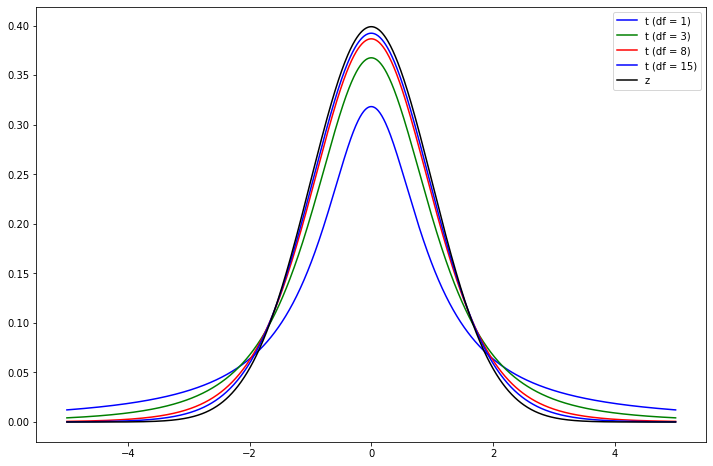

In [18]:
# degrees of dreedom değeri büyüdükçe, tailler normal dağılıma yaklaşıyor 
plt.figure(figsize=(12, 8))
xs = np.linspace(-5,5,1000)

plt.plot(xs, stats.t.pdf(xs, 1), 'b', label = 't (df = 1)')
plt.plot(xs, stats.t.pdf(xs, 3), 'g', label = 't (df = 3)')
plt.plot(xs, stats.t.pdf(xs, 8), 'r', label = 't (df = 8)')
plt.plot(xs, stats.t.pdf(xs, 15), 'b', label = 't (df = 15)')
plt.plot(xs, stats.norm.pdf(xs), 'black', label = 'z')

plt.legend()
plt.show()

## Confidence Intervals Using the Normal Distribution

If we’re working with larger samples (n≥30), we can assume that the sampling distribution of the sample mean is normally distributed (thanks to the Central Limit Theorem) and can instead use the norm.interval() function from the scipy.stats library.

In [19]:
import seaborn as sns

In [20]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

1. Load "tips" dataset from Seaborn library

In [21]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


2. Draw a set of vertical bar plots (based on "total_bill") grouped by "day" variable:

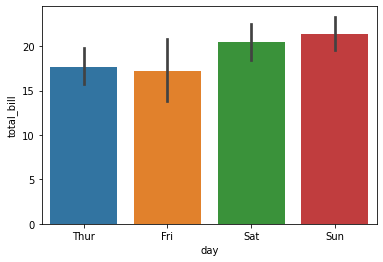

In [22]:
sns.barplot(data = tips, y ='total_bill', x = 'day');

3. Subset a dataframe just including Sunday tips

In [23]:
tipsSun = tips[tips['day'] == 'Sun']
tipsSun.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


4. Calculate mean and std

In [24]:
tipsSun['total_bill'].mean()

21.410000000000004

In [25]:
tipsSun['total_bill'].std()

8.832121828869889

5. Calculate standart error of the mean

In [26]:
sem = tipsSun['total_bill'].std() / np.sqrt(len(tipsSun))

In [27]:
sem

1.0131138555021968

6. Calculate the margin of error (95%)

In [28]:
z = stats.norm.ppf(0.975)
z


1.959963984540054

In [29]:
moe = z * sem

In [30]:
moe

1.9856666690228222

7. Calculate the upper confidence limit

In [31]:
tipsSun['total_bill'].mean() + moe

23.395666669022827

8. Calculate the lower confidence limit

In [32]:
tipsSun['total_bill'].mean() - moe

19.42433333097718

9. Calculate 95% Confidence Interval around the mean by using scipy.stats

In [33]:
stats.norm.interval(0.95, loc = tipsSun['total_bill'].mean(), scale = sem)

(19.42433333097718, 23.395666669022827)

### Exercise 8.7 (Large Samples)
*Source: Wackerly, D., Mendenhall, W., & Scheaffer, R. L. (2014). Mathematical statistics with applications. Cengage Learning.*

- The shopping times of n = 64 randomly selected customers at a local supermarket were recorded. 

- The average and variance of the 64 shopping times were 33 $minutes$ and 256 $minutes^2$, respectively. 

- Estimate μ, the true average shopping time per customer, with a confidence coefficient of 1 − α = .90.

In [34]:
n = 64
xbar = 33
var = 256
cl = 0.90 
s = np.sqrt(var)

sem = s/np.sqrt(n)


In [35]:
sem

2.0

In [36]:
stats.norm.interval(0.90, loc = xbar, scale = sem)

(29.710292746097053, 36.28970725390295)

#### Proof

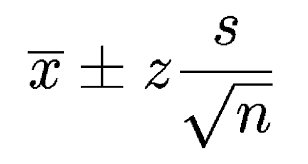

In [37]:
z = stats.norm.ppf(0.90)
z

1.2815515655446004

In [38]:
moe = z * sem
moe

2.5631031310892007

In [39]:
low_limit = xbar - moe
low_limit

30.4368968689108

In [40]:
high_limit = xbar + moe
high_limit

35.5631031310892

### Exercise 8.11 (Small Samples)
*Source: Wackerly, D., Mendenhall, W., & Scheaffer, R. L. (2014). Mathematical statistics with applications. Cengage Learning.*

A manufacturer of gunpowder has developed a new powder, which was tested in eight shells. The resulting muzzle velocities, in feet per second, were as follows:

3005 2925 2935 2965

2995 3005 2937 2905

Find a 95% confidence interval for the true average velocity μ for shells of this type. Assume that muzzle velocities are approximately normally distributed.

In [41]:
x = [3005, 2925, 2935, 2965, 2995, 3005, 2937, 2905]

In [42]:
# Sample size
n = 8

# Sample mean
xbar = np.mean(x)

# Sample standard deviation
s = np.std(x, ddof = 1)

# Confidence level
cl = 0.95

In [43]:
xbar

2959.0

In [44]:
s

39.08964057138413

In [45]:
stats.t.interval(0.95, df = n-1, loc = xbar, scale = s/np.sqrt(n))

(2926.3202426713874, 2991.6797573286126)

#### Proof

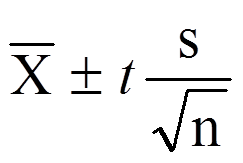

In [46]:
t = stats.t.ppf(0.975, df = n-1)
t

2.3646242510102993

In [47]:
sem = s/np.sqrt(n)
sem

13.820274961085254

In [48]:
moe = t* sem
moe

32.67975732861261

In [49]:
low_limit = xbar - moe
low_limit

2926.3202426713874

In [50]:
high_limit = xbar + moe
high_limit

2991.6797573286126